In [ ]:
# outliers are extreme values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
salary_data = [50000, 60000, 70000, 80000, 90000, 150000, 2000000, 250000, 300000, 350000,
               400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000]

In [4]:
salary_data

[50000,
 60000,
 70000,
 80000,
 90000,
 150000,
 2000000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000]

In [ ]:
# five point summary
# min,25th,50th percentile,75th percentile,100th percentile,max

In [7]:
np.quantile(salary_data, [0, 0.25, 0.5, 0.75, .1])

array([ 50000., 135000., 425000., 662500.,  69000.])

In [11]:
df=pd.DataFrame(salary_data,columns=['salary_data'])

In [12]:
df

,salary_data
0,50000
1,60000
2,70000
3,80000
4,90000
5,150000
6,2000000
7,250000
8,300000
9,350000


In [13]:
df.describe()

,salary_data
count,2.000000e+01
mean,4.825000e+05
std,4.459983e+05
min,5.000000e+04
25%,1.350000e+05
50%,4.250000e+05
75%,6.625000e+05
max,2.000000e+06


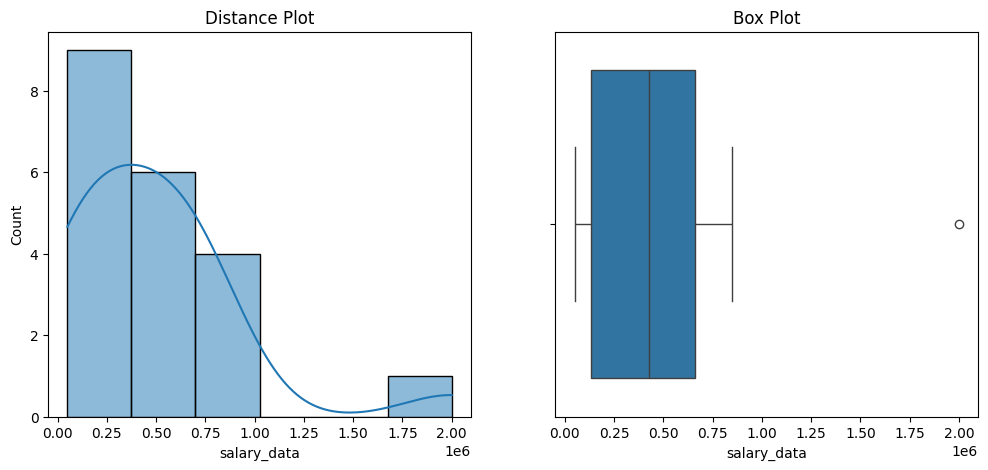

In [21]:
# To check outliers>> distplot,boxplot

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_data'],kde=True)
plt.title("Distance Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_data')
plt.title("Box Plot")
plt.show()

In [ ]:
# here the distribution is not skewed as the outliers are present on both sides
# in box plot,we see there are outliers
# dropping the outliers
# capping the outliers
# replace with mean and median


In [16]:
# dropping the outliers
Q1=df['salary_data'].quantile(0.25)
Q2=df['salary_data'].quantile(0.75)

IQR=Q2-Q1

lower_fence=Q1-1.5*IQR
upper_fence=Q2+1.5*IQR


In [17]:
df_filtered=df[(df['salary_data']>lower_fence) & (df['salary_data']<upper_fence)]

In [18]:
df.shape

(20, 1)

In [19]:
df_filtered.shape

(19, 1)

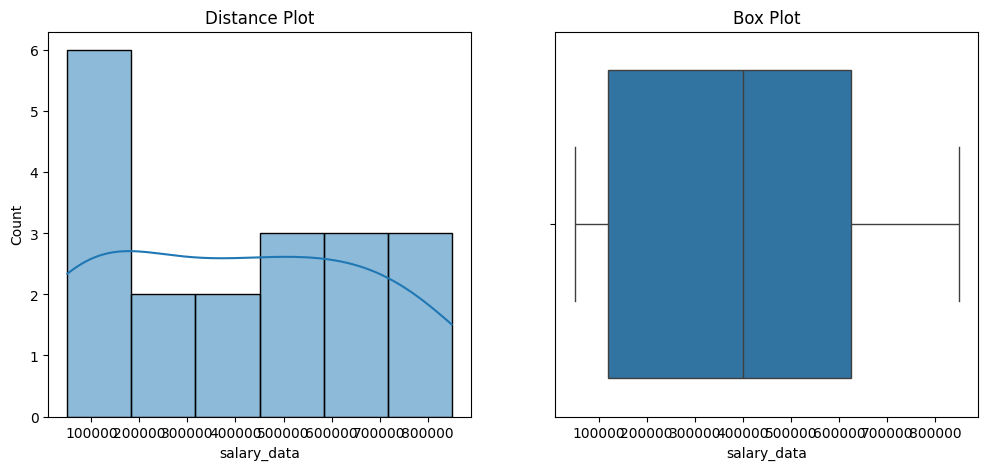

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary_data'],kde=True)
plt.title("Distance Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df_filtered,x='salary_data')
plt.title("Box Plot")
plt.show()

In [25]:
# imputation with mean and median
np.where(df.salary_data>upper_fence) | (df.salary_data<lower_fence),df['salary_data'].mean(),df['salary_data'].median()

(0     True
 1     True
 2     True
 3     True
 4     True
 5     True
 6     True
 7     True
 8     True
 9     True
 10    True
 11    True
 12    True
 13    True
 14    True
 15    True
 16    True
 17    True
 18    True
 19    True
 Name: salary_data, dtype: bool,
 np.float64(482500.0),
 np.float64(425000.0))

In [26]:
np.where(df.salary_data>upper_fence) | (df.salary_data<lower_fence),df['salary_data'].mean(),df['salary_data'].median()

(0     True
 1     True
 2     True
 3     True
 4     True
 5     True
 6     True
 7     True
 8     True
 9     True
 10    True
 11    True
 12    True
 13    True
 14    True
 15    True
 16    True
 17    True
 18    True
 19    True
 Name: salary_data, dtype: bool,
 np.float64(482500.0),
 np.float64(425000.0))

KeyError: 'salary_imputed_mean'

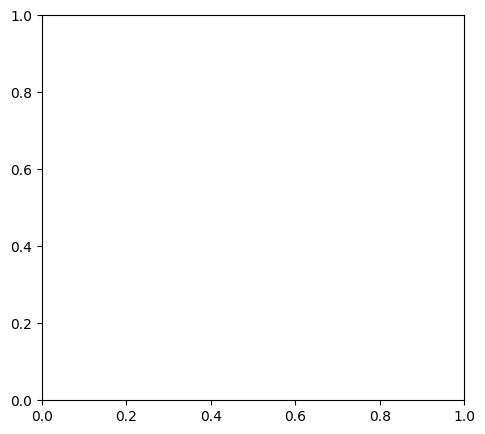

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_mean'],kde=True)
plt.title("Distance Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_imputed_mean')
plt.title("Box Plot")
plt.show()

In [31]:
# capping >> replacing nearest value which is not an outlier
df

,salary_data
0,50000
1,60000
2,70000
3,80000
4,90000
5,150000
6,2000000
7,250000
8,300000
9,350000


In [33]:
lower_cap=df['salary_data'].quantile(0.05) # lower cap is the 5th percentile
upper_cap=df['salary_data'].quantile(0.95) # upper cap is the 95th percentile

In [34]:
lower_cap


np.float64(59500.0)

In [35]:
upper_cap

np.float64(907500.0000000008)

In [ ]:
# replace outliers with cap
# where(condition,[x,y],/)
# Return elements chosen from x or y depending on condition
# if df['salary_data'] < lower_cap >> replace with lower_cap
np.where(df['salary_data'] < lower_cap, lower_cap, np.where(df['salary_data'] > upper_cap, upper_cap, df['salary_data']))

array([ 59500.,  60000.,  70000.,  80000.,  90000., 150000., 907500.,
       250000., 300000., 350000., 400000., 450000., 500000., 550000.,
       600000., 650000., 700000., 750000., 800000., 850000.])